In [409]:
import os
from os import listdir
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns

import cv2
from matplotlib.image import imread

import glob
import PIL
import random

random.seed(48)

In [410]:
dicom_data = pd.read_csv('../data/raw/CBIS-DDSM/csv/dicom_info.csv')
image_dir = '../data/raw/'

In [411]:
dicom_data.head()

file_path  \
0  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...   
1  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...   
2  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...   
3  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   
4  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   

                                          image_path  AccessionNumber  \
0  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...              NaN   
1  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...              NaN   
2  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...              NaN   
3  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   
4  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   

   BitsAllocated  BitsStored BodyPartExamined  Columns  ContentDate  \
0             16          16           BREAST      351     20160426   
1             16          16           BREAST     3526     20160426   
2             16          16           BREAST     1546     20160503   
3             16          16           BREAST       97     20160503   
4              8           8      Left Breast     3104     20160503   

   ContentTime ConversionType  ...  \
0   131732.685            WSD  ...   
1   143829.101            WSD  ...   
2   111956.298            WSD  ...   
3   115347.770            WSD  ...   
4   115347.770            WSD  ...   

   SecondaryCaptureDeviceManufacturerModelName      SeriesDescription  \
0                                       MATLAB         cropped images   
1                                       MATLAB  full mammogram images   
2                                       MATLAB  full mammogram images   
3                                       MATLAB         cropped images   
4                                       MATLAB                    NaN   

                                   SeriesInstanceUID SeriesNumber  \
0  1.3.6.1.4.1.9590.100.1.2.129308726812851964007...            1   
1  1.3.6.1.4.1.9590.100.1.2.248386742010678582309...            1   
2  1.3.6.1.4.1.9590.100.1.2.267213171011171858918...            1   
3  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   
4  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   

  SmallestImagePixelValue  SpecificCharacterSet   StudyDate StudyID  \
0                   23078            ISO_IR 100  20160720.0    DDSM   
1                       0            ISO_IR 100  20160720.0    DDSM   
2                       0            ISO_IR 100  20160807.0    DDSM   
3                   32298            ISO_IR 100  20170829.0    DDSM   
4                       0            ISO_IR 100         NaN    DDSM   

                                    StudyInstanceUID  StudyTime  
0  1.3.6.1.4.1.9590.100.1.2.271867287611061855725...   214951.0  
1  1.3.6.1.4.1.9590.100.1.2.161516517311681906612...   193426.0  
2  1.3.6.1.4.1.9590.100.1.2.291043622711253836701...   161814.0  
3  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...   180109.0  
4  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...        NaN  

[5 rows x 38 columns]

In [412]:
cropped_images = dicom_data[dicom_data.SeriesDescription == 'cropped images'].image_path
cropped_images.head()

0     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...
3     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...
6     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
7     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
10    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
Name: image_path, dtype: object

In [413]:
#put the image path before the image name

cropped_images = cropped_images.apply(lambda x: image_dir + x)
cropped_images.head()

0     ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
3     ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
6     ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
7     ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
10    ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
Name: image_path, dtype: object

In [414]:
cropped_images[0:10]

0     ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
3     ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
6     ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
7     ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
10    ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
13    ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
19    ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
21    ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
26    ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
28    ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
Name: image_path, dtype: object

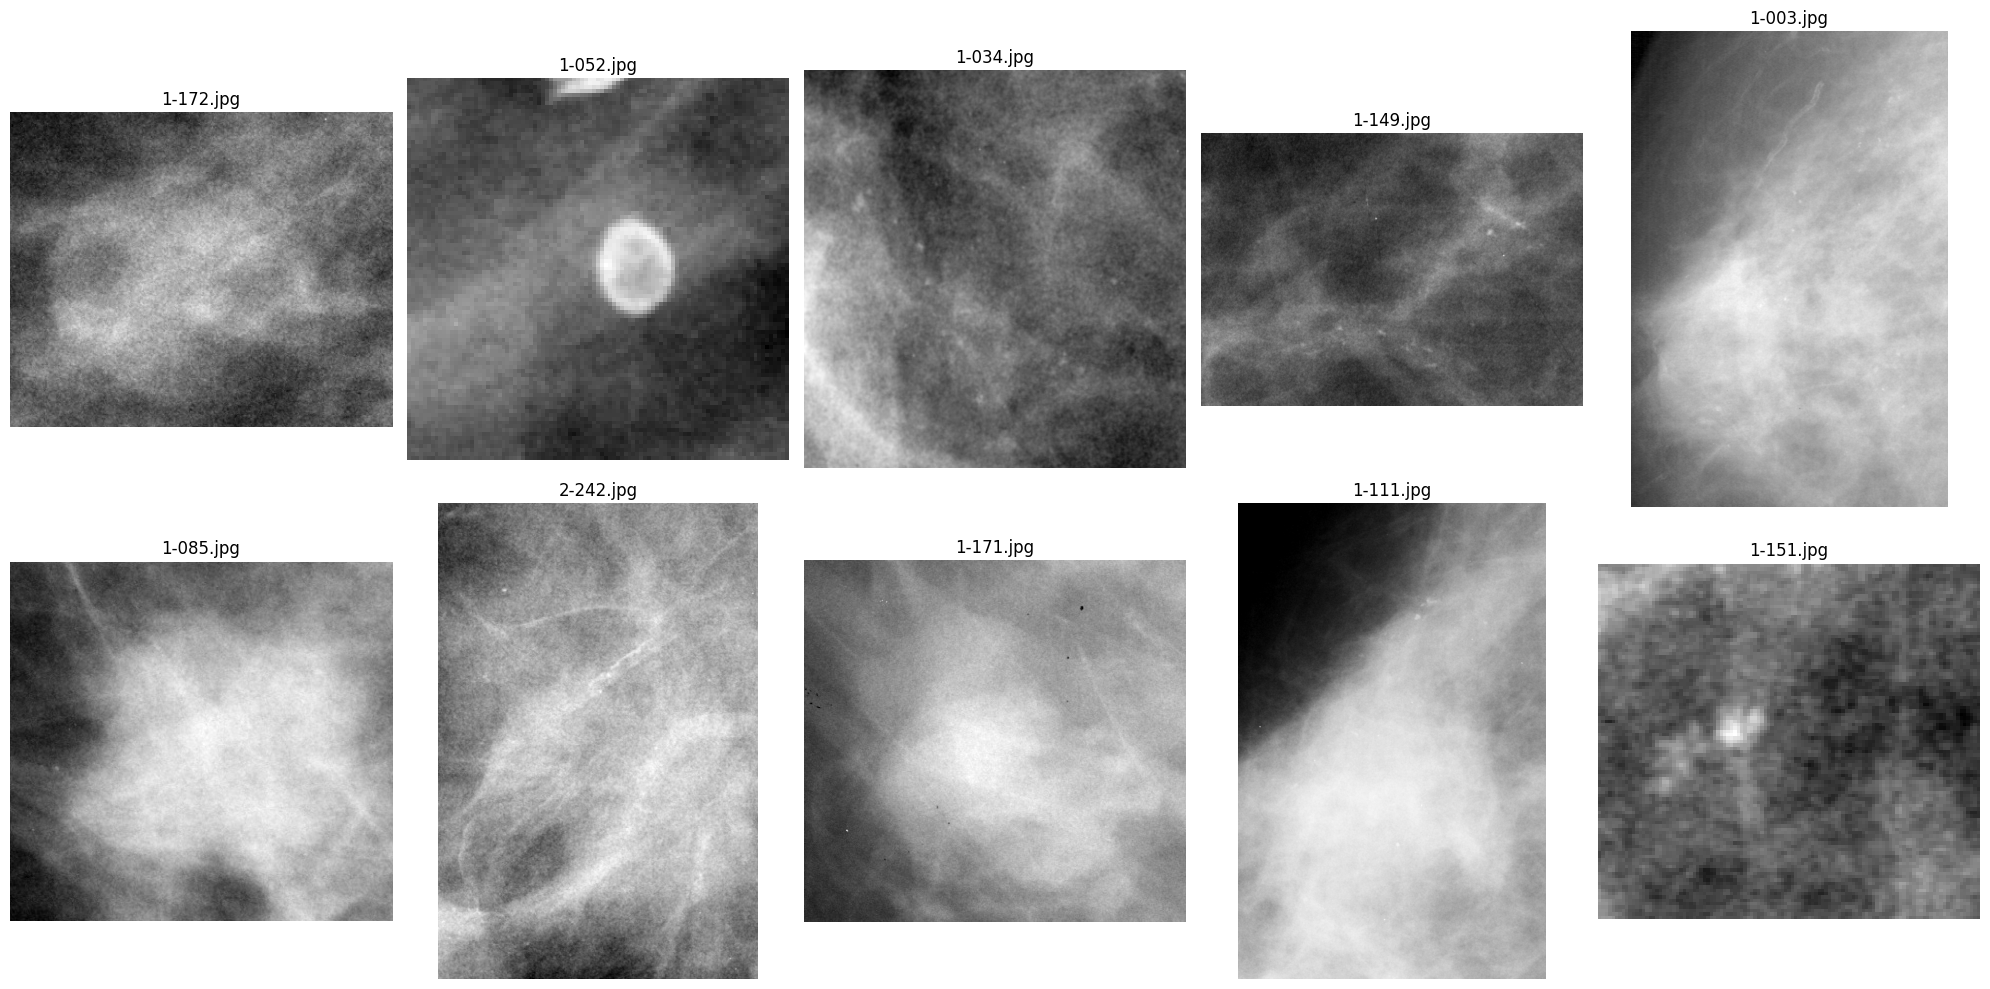

In [415]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
ax = ax.ravel()
for i, file in enumerate(cropped_images[0:10]):
    img = imread(file)
    ax[i].imshow(img, cmap='gray')
    ax[i].axis('off')
    ax[i].set_title(file.split('/')[-1], fontsize=12)
plt.tight_layout()

plt.show()
    


In [416]:
full_mammogram_images = dicom_data[dicom_data.SeriesDescription == 'full mammogram images'].image_path
full_mammogram_images.head()

1     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...
2     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...
11    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.210396...
12    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.749566...
15    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.987658...
Name: image_path, dtype: object

In [417]:
full_mammogram_images = full_mammogram_images.apply(lambda x: '../data/raw/' + x)
full_mammogram_images.head()

1     ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
2     ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
11    ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
12    ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
15    ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
Name: image_path, dtype: object

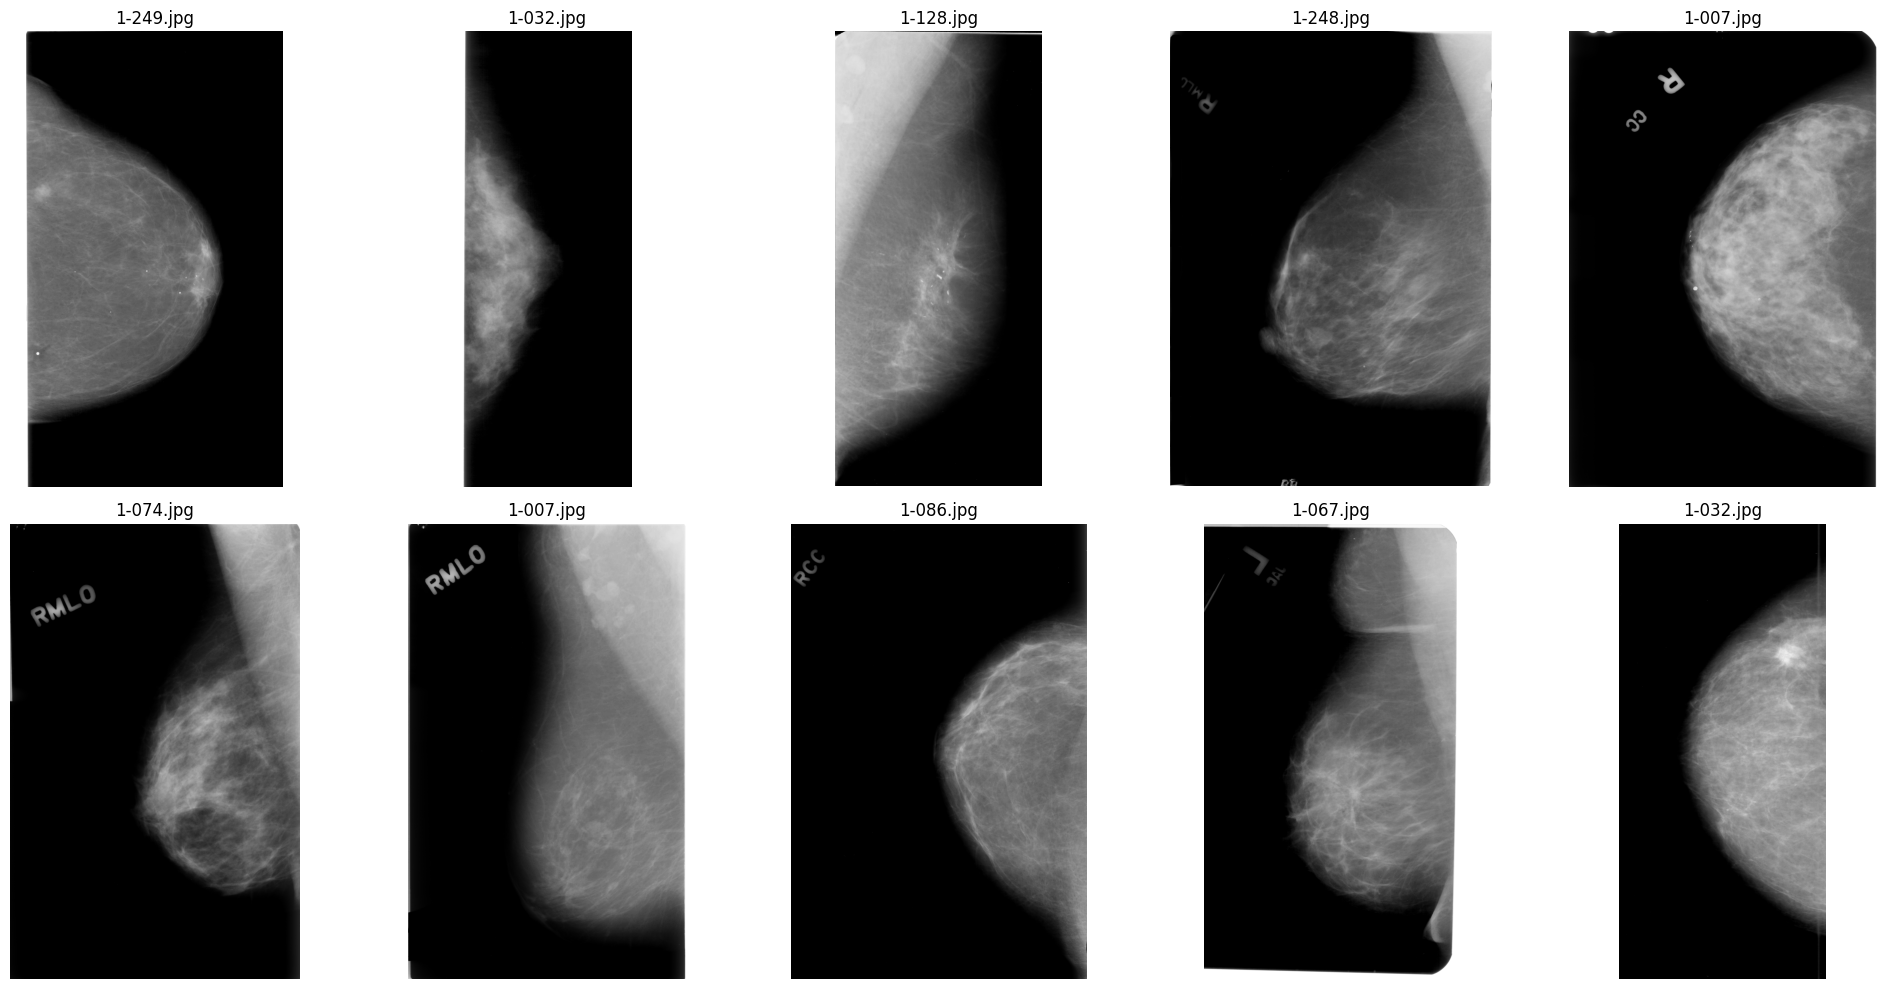

In [418]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
ax = ax.ravel()
for i, file in enumerate(full_mammogram_images[0:10]):
    img = imread(file)
    ax[i].imshow(img, cmap='gray')
    ax[i].axis('off')
    ax[i].set_title(file.split('/')[-1], fontsize=12)
plt.tight_layout()

plt.show()

In [419]:
ROI_mask_images = dicom_data[dicom_data.SeriesDescription == 'ROI mask images'].image_path
ROI_mask_images.head()

5     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
8     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
9     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
14    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.236373...
20    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.357008...
Name: image_path, dtype: object

In [420]:
ROI_mask_images = ROI_mask_images.apply(lambda x: '../data/raw/' + x)
ROI_mask_images.head()

5     ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
8     ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
9     ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
14    ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
20    ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
Name: image_path, dtype: object

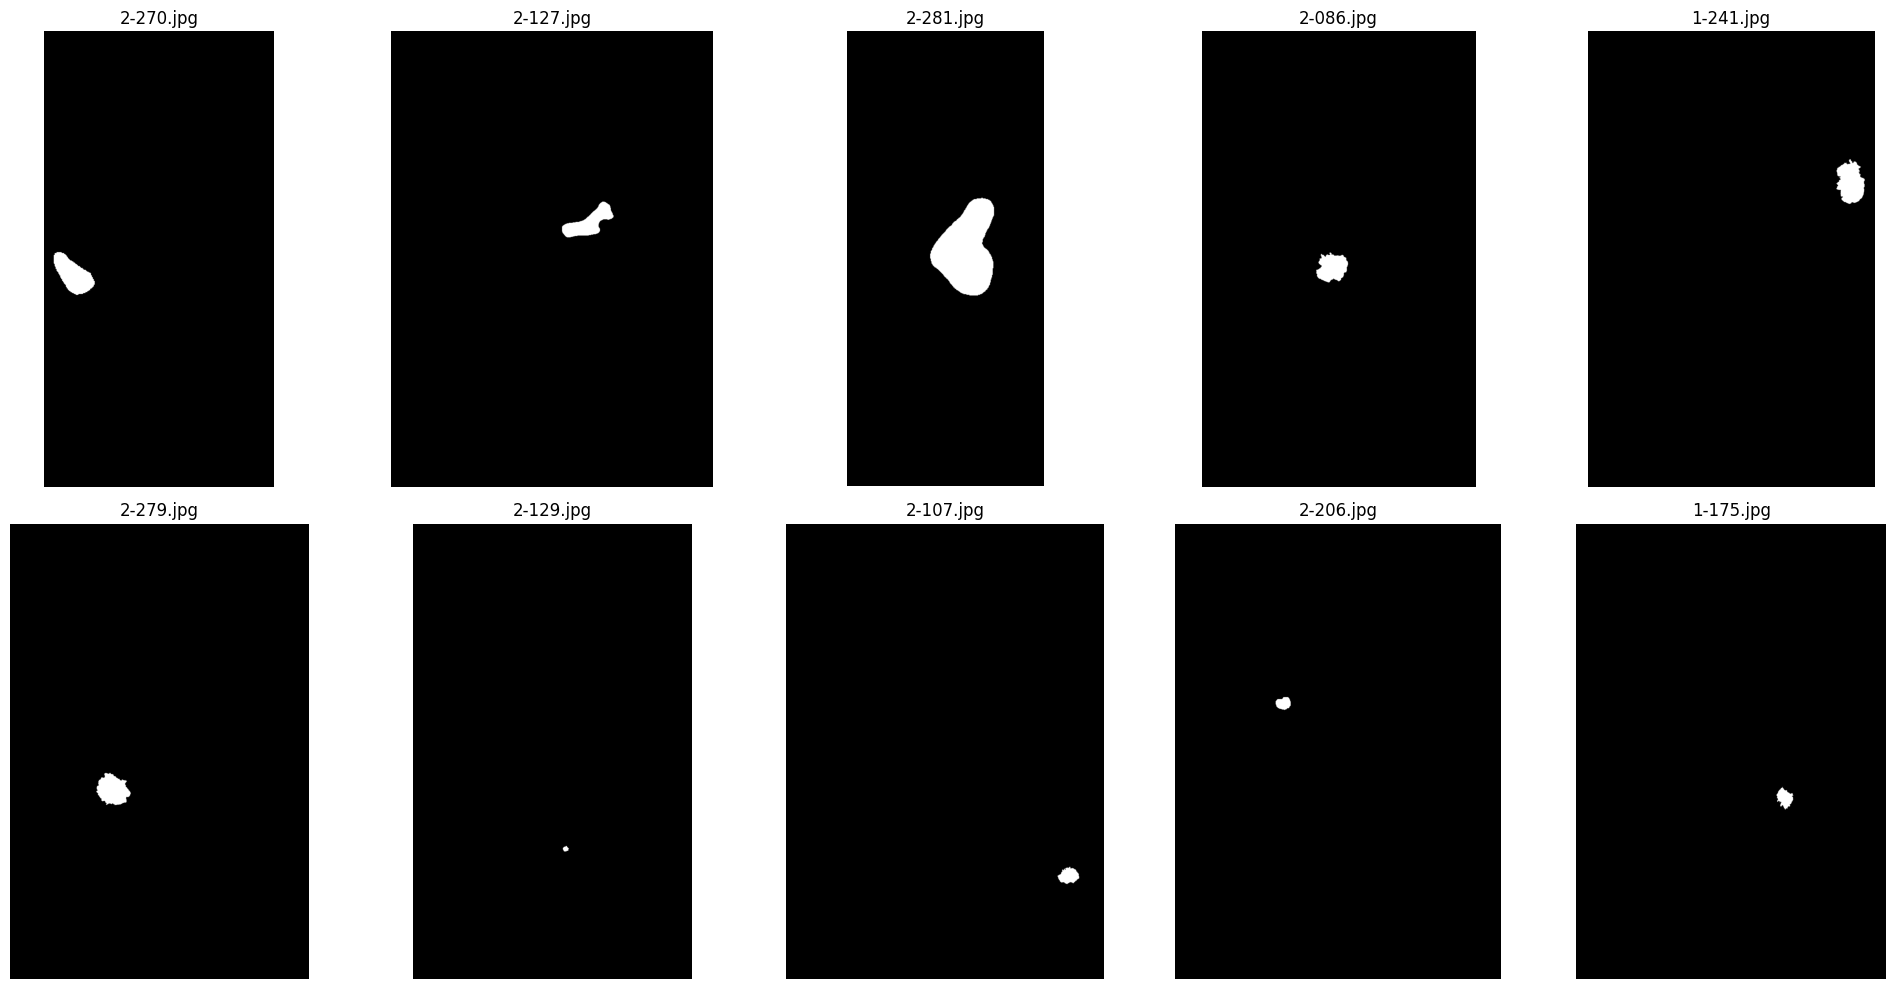

In [421]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
ax = ax.ravel()
for i, file in enumerate(ROI_mask_images[0:10]):
    img = imread(file)
    ax[i].imshow(img, cmap='gray')
    ax[i].axis('off')
    ax[i].set_title(file.split('/')[-1], fontsize=12)
plt.tight_layout()

plt.show()

In [422]:
calc_case_df = pd.read_csv('../data/raw/CBIS-DDSM/csv/calc_case_description_train_set.csv')
calc_case_df.head()

patient_id  breast density left or right breast image view  abnormality id  \
0    P_00005               3                RIGHT         CC               1   
1    P_00005               3                RIGHT        MLO               1   
2    P_00007               4                 LEFT         CC               1   
3    P_00007               4                 LEFT        MLO               1   
4    P_00008               1                 LEFT         CC               1   

  abnormality type    calc type calc distribution  assessment  \
0    calcification    AMORPHOUS         CLUSTERED           3   
1    calcification    AMORPHOUS         CLUSTERED           3   
2    calcification  PLEOMORPHIC            LINEAR           4   
3    calcification  PLEOMORPHIC            LINEAR           4   
4    calcification          NaN          REGIONAL           2   

                 pathology  subtlety  \
0                MALIGNANT         3   
1                MALIGNANT         3   
2                   BENIGN         4   
3                   BENIGN         4   
4  BENIGN_WITHOUT_CALLBACK         3   

                                     image file path  \
0  Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...   
1  Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...   
2  Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...   
3  Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...   
4  Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...   

                             cropped image file path  \
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...   
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....   
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...   

                                  ROI mask file path  
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...  
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....  
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...  
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...  
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...

In [423]:
mass_case_df = pd.read_csv('../data/raw/CBIS-DDSM/csv/mass_case_description_train_set.csv')
mass_case_df.head()

patient_id  breast_density left or right breast image view  abnormality id  \
0    P_00001               3                 LEFT         CC               1   
1    P_00001               3                 LEFT        MLO               1   
2    P_00004               3                 LEFT         CC               1   
3    P_00004               3                 LEFT        MLO               1   
4    P_00004               3                RIGHT        MLO               1   

  abnormality type                          mass shape   mass margins  \
0             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
1             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
2             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
3             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
4             mass                                OVAL  CIRCUMSCRIBED   

   assessment  pathology  subtlety  \
0           4  MALIGNANT         4   
1           4  MALIGNANT         4   
2           4     BENIGN         3   
3           4     BENIGN         3   
4           4     BENIGN         5   

                                     image file path  \
0  Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...   
1  Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...   
2  Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...   
3  Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...   
4  Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...   

                             cropped image file path  \
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...   
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...   
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....   

                                  ROI mask file path  
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...  
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...  
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...  
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...  
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....

# Data cleaning

In [424]:
dicom_cleaned_data = dicom_data.copy()
dicom_cleaned_data.head()

file_path  \
0  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...   
1  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...   
2  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...   
3  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   
4  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   

                                          image_path  AccessionNumber  \
0  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...              NaN   
1  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...              NaN   
2  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...              NaN   
3  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   
4  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   

   BitsAllocated  BitsStored BodyPartExamined  Columns  ContentDate  \
0             16          16           BREAST      351     20160426   
1             16          16           BREAST     3526     20160426   
2             16          16           BREAST     1546     20160503   
3             16          16           BREAST       97     20160503   
4              8           8      Left Breast     3104     20160503   

   ContentTime ConversionType  ...  \
0   131732.685            WSD  ...   
1   143829.101            WSD  ...   
2   111956.298            WSD  ...   
3   115347.770            WSD  ...   
4   115347.770            WSD  ...   

   SecondaryCaptureDeviceManufacturerModelName      SeriesDescription  \
0                                       MATLAB         cropped images   
1                                       MATLAB  full mammogram images   
2                                       MATLAB  full mammogram images   
3                                       MATLAB         cropped images   
4                                       MATLAB                    NaN   

                                   SeriesInstanceUID SeriesNumber  \
0  1.3.6.1.4.1.9590.100.1.2.129308726812851964007...            1   
1  1.3.6.1.4.1.9590.100.1.2.248386742010678582309...            1   
2  1.3.6.1.4.1.9590.100.1.2.267213171011171858918...            1   
3  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   
4  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   

  SmallestImagePixelValue  SpecificCharacterSet   StudyDate StudyID  \
0                   23078            ISO_IR 100  20160720.0    DDSM   
1                       0            ISO_IR 100  20160720.0    DDSM   
2                       0            ISO_IR 100  20160807.0    DDSM   
3                   32298            ISO_IR 100  20170829.0    DDSM   
4                       0            ISO_IR 100         NaN    DDSM   

                                    StudyInstanceUID  StudyTime  
0  1.3.6.1.4.1.9590.100.1.2.271867287611061855725...   214951.0  
1  1.3.6.1.4.1.9590.100.1.2.161516517311681906612...   193426.0  
2  1.3.6.1.4.1.9590.100.1.2.291043622711253836701...   161814.0  
3  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...   180109.0  
4  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...        NaN  

[5 rows x 38 columns]

In [425]:
dicom_cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    10237 non-null  object 
 1   image_path                                   10237 non-null  object 
 2   AccessionNumber                              0 non-null      float64
 3   BitsAllocated                                10237 non-null  int64  
 4   BitsStored                                   10237 non-null  int64  
 5   BodyPartExamined                             10237 non-null  object 
 6   Columns                                      10237 non-null  int64  
 7   ContentDate                                  10237 non-null  int64  
 8   ContentTime                                  10237 non-null  float64
 9   ConversionType                               10237 non-null  object 
 10

In [426]:
dicom_cleaned_data.drop(['PatientBirthDate','AccessionNumber','Columns','ContentDate','ContentTime','PatientSex','PatientBirthDate',
                                                'ReferringPhysicianName','Rows',
                                                'StudyDate','StudyTime','InstanceNumber','SeriesInstanceUID','SeriesNumber'],axis =1, inplace=True)
dicom_cleaned_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 25 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   file_path                                    10237 non-null  object
 1   image_path                                   10237 non-null  object
 2   BitsAllocated                                10237 non-null  int64 
 3   BitsStored                                   10237 non-null  int64 
 4   BodyPartExamined                             10237 non-null  object
 5   ConversionType                               10237 non-null  object
 6   HighBit                                      10237 non-null  int64 
 7   LargestImagePixelValue                       10237 non-null  int64 
 8   Laterality                                   9671 non-null   object
 9   Modality                                     10237 non-null  object
 10  PatientID 

In [427]:
dicom_cleaned_data.isna().sum()

file_path                                        0
image_path                                       0
BitsAllocated                                    0
BitsStored                                       0
BodyPartExamined                                 0
ConversionType                                   0
HighBit                                          0
LargestImagePixelValue                           0
Laterality                                     566
Modality                                         0
PatientID                                        0
PatientName                                      0
PatientOrientation                               0
PhotometricInterpretation                        0
PixelRepresentation                              0
SOPClassUID                                      0
SOPInstanceUID                                   0
SamplesPerPixel                                  0
SecondaryCaptureDeviceManufacturer               0
SecondaryCaptureDeviceManufactu

In [428]:
#get null SeriesDescription
null_series_desc=dicom_cleaned_data[dicom_cleaned_data.SeriesDescription.isna()]["image_path"]
null_series_desc.head()


4     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...
27    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.281604...
73    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.189733...
76    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.316322...
85    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.397101...
Name: image_path, dtype: object

In [429]:
null_series_desc = null_series_desc.apply(lambda x: image_dir + x)


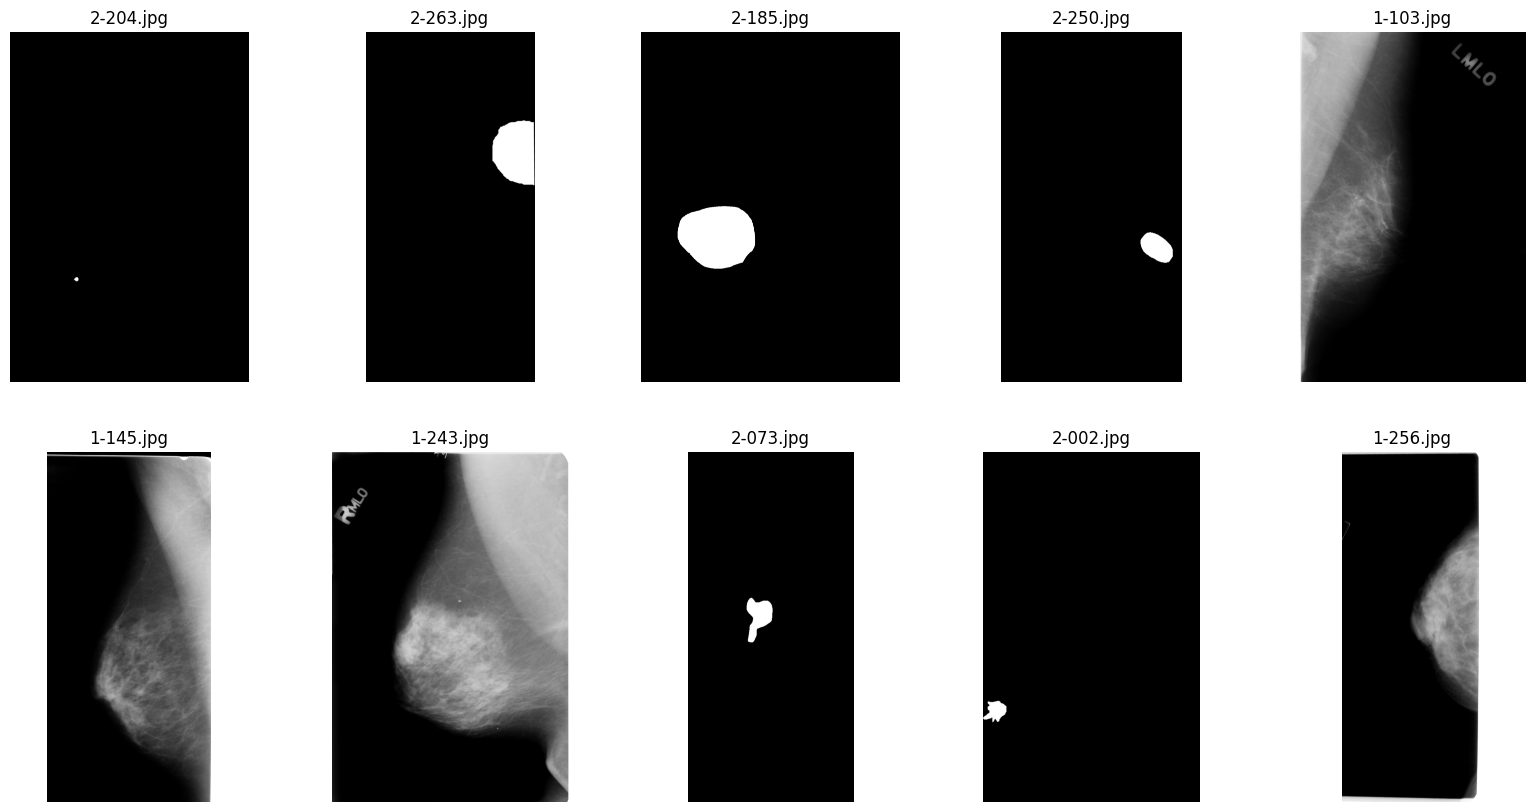

In [430]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
ax = ax.ravel()
for i, file in enumerate(null_series_desc[0:10]):
    img = imread(file)
    ax[i].imshow(img, cmap='gray')
    ax[i].axis('off')
    ax[i].set_title(file.split('/')[-1], fontsize=12)

The pattern seems to be in the name so lets rename in this way:

starting number->1 : full mammogram images

->2: ROI mask images

In [431]:
#apply custom function only to null values in SeriesDescription

def get_image_type(image_path):
    name = image_path.split('/')[-1]
    #check first number in the name
    if name[0] == '1':
        return 'full mammogram images'
    elif name[0] == '2':
        return 'ROI mask images'
    else:
        pass
    
    
dicom_cleaned_data.loc[dicom_cleaned_data.SeriesDescription.isna(), 'SeriesDescription'] = dicom_cleaned_data.loc[dicom_cleaned_data.SeriesDescription.isna(), 'image_path'].apply(get_image_type)

In [432]:
dicom_cleaned_data.isna().sum()

file_path                                        0
image_path                                       0
BitsAllocated                                    0
BitsStored                                       0
BodyPartExamined                                 0
ConversionType                                   0
HighBit                                          0
LargestImagePixelValue                           0
Laterality                                     566
Modality                                         0
PatientID                                        0
PatientName                                      0
PatientOrientation                               0
PhotometricInterpretation                        0
PixelRepresentation                              0
SOPClassUID                                      0
SOPInstanceUID                                   0
SamplesPerPixel                                  0
SecondaryCaptureDeviceManufacturer               0
SecondaryCaptureDeviceManufactu

In [433]:
#check unique values in SeriesDescription
dicom_cleaned_data.SeriesDescription.unique()

array(['cropped images', 'full mammogram images', 'ROI mask images'],
      dtype=object)

In [434]:
#drop laterality column
dicom_cleaned_data.drop('Laterality', axis=1, inplace=True)
dicom_cleaned_data.head()

file_path  \
0  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...   
1  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...   
2  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...   
3  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   
4  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   

                                          image_path  BitsAllocated  \
0  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...             16   
1  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...             16   
2  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...             16   
3  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...             16   
4  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              8   

   BitsStored BodyPartExamined ConversionType  HighBit  \
0          16           BREAST            WSD       15   
1          16           BREAST            WSD       15   
2          16           BREAST            WSD       15   
3          16           BREAST            WSD       15   
4           8      Left Breast            WSD        7   

   LargestImagePixelValue Modality                          PatientID  ...  \
0                   65535       MG  Mass-Training_P_01265_RIGHT_MLO_1  ...   
1                   65535       MG     Mass-Training_P_01754_RIGHT_CC  ...   
2                   65535       MG     Calc-Training_P_00232_RIGHT_CC  ...   
3                   65535       MG        Calc-Test_P_00562_LEFT_CC_2  ...   
4                     255       MG              P_00562_LEFT_CC_2.dcm  ...   

                 SOPClassUID  \
0  1.2.840.10008.5.1.4.1.1.7   
1  1.2.840.10008.5.1.4.1.1.7   
2  1.2.840.10008.5.1.4.1.1.7   
3  1.2.840.10008.5.1.4.1.1.7   
4  1.2.840.10008.5.1.4.1.1.7   

                                      SOPInstanceUID SamplesPerPixel  \
0  1.3.6.1.4.1.9590.100.1.2.426380754911844882201...               1   
1  1.3.6.1.4.1.9590.100.1.2.235715018911442345533...               1   
2  1.3.6.1.4.1.9590.100.1.2.212917405611495375422...               1   
3  1.3.6.1.4.1.9590.100.1.2.405776661412249467913...               1   
4  1.3.6.1.4.1.9590.100.1.2.418434643810489919922...               1   

   SecondaryCaptureDeviceManufacturer  \
0                           MathWorks   
1                           MathWorks   
2                           MathWorks   
3                           MathWorks   
4                           MathWorks   

  SecondaryCaptureDeviceManufacturerModelName      SeriesDescription  \
0                                      MATLAB         cropped images   
1                                      MATLAB  full mammogram images   
2                                      MATLAB  full mammogram images   
3                                      MATLAB         cropped images   
4                                      MATLAB        ROI mask images   

   SmallestImagePixelValue SpecificCharacterSet StudyID  \
0                    23078           ISO_IR 100    DDSM   
1                        0           ISO_IR 100    DDSM   
2                        0           ISO_IR 100    DDSM   
3                    32298           ISO_IR 100    DDSM   
4                        0           ISO_IR 100    DDSM   

                                    StudyInstanceUID  
0  1.3.6.1.4.1.9590.100.1.2.271867287611061855725...  
1  1.3.6.1.4.1.9590.100.1.2.161516517311681906612...  
2  1.3.6.1.4.1.9590.100.1.2.291043622711253836701...  
3  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...  
4  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...  

[5 rows x 24 columns]

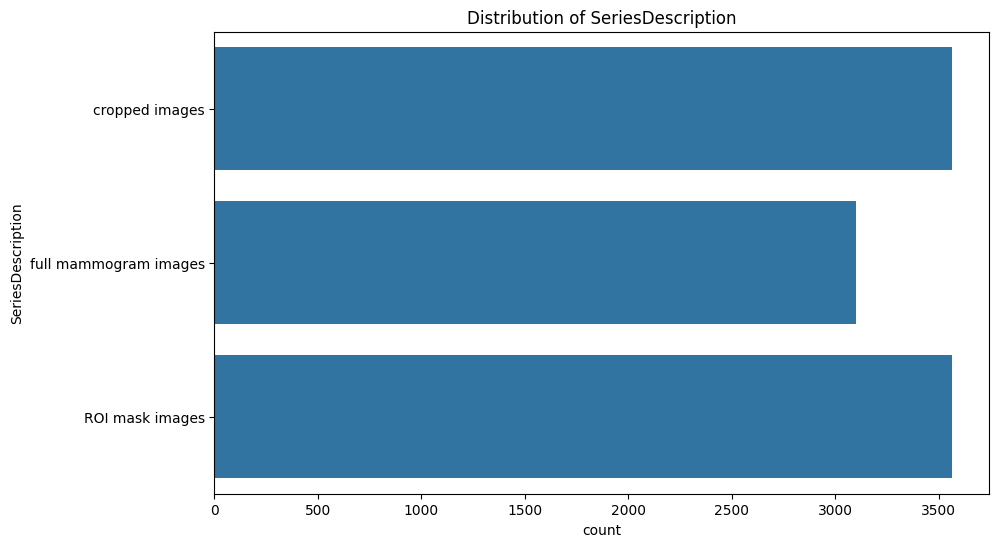

In [435]:
#histogram of SeriesDescription
plt.figure(figsize=(10, 6))
sns.countplot(dicom_cleaned_data.SeriesDescription)
plt.title('Distribution of SeriesDescription')
plt.show()

we want to keep only cropped images

In [436]:
#drop all rows that have SeriesDescription not as 'cropped images'
dicom_cleaned_data = dicom_cleaned_data[dicom_cleaned_data.SeriesDescription == 'cropped images']
dicom_cleaned_data.head()

file_path  \
0   CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...   
3   CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   
6   CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.15333...   
7   CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.17899...   
10  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.41183...   

                                           image_path  BitsAllocated  \
0   CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...             16   
3   CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...             16   
6   CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...             16   
7   CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...             16   
10  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...             16   

    BitsStored BodyPartExamined ConversionType  HighBit  \
0           16           BREAST            WSD       15   
3           16           BREAST            WSD       15   
6           16           BREAST            WSD       15   
7           16           BREAST            WSD       15   
10          16           BREAST            WSD       15   

    LargestImagePixelValue Modality                          PatientID  ...  \
0                    65535       MG  Mass-Training_P_01265_RIGHT_MLO_1  ...   
3                    65535       MG        Calc-Test_P_00562_LEFT_CC_2  ...   
6                    65535       MG   Calc-Training_P_00181_RIGHT_CC_1  ...   
7                    65535       MG    Calc-Training_P_01015_LEFT_CC_1  ...   
10                   65535       MG    Calc-Training_P_01497_LEFT_CC_1  ...   

                  SOPClassUID  \
0   1.2.840.10008.5.1.4.1.1.7   
3   1.2.840.10008.5.1.4.1.1.7   
6   1.2.840.10008.5.1.4.1.1.7   
7   1.2.840.10008.5.1.4.1.1.7   
10  1.2.840.10008.5.1.4.1.1.7   

                                       SOPInstanceUID SamplesPerPixel  \
0   1.3.6.1.4.1.9590.100.1.2.426380754911844882201...               1   
3   1.3.6.1.4.1.9590.100.1.2.405776661412249467913...               1   
6   1.3.6.1.4.1.9590.100.1.2.398771175312365272736...               1   
7   1.3.6.1.4.1.9590.100.1.2.131386567811700111319...               1   
10  1.3.6.1.4.1.9590.100.1.2.529049226133609743281...               1   

    SecondaryCaptureDeviceManufacturer  \
0                            MathWorks   
3                            MathWorks   
6                            MathWorks   
7                            MathWorks   
10                           MathWorks   

   SecondaryCaptureDeviceManufacturerModelName SeriesDescription  \
0                                       MATLAB    cropped images   
3                                       MATLAB    cropped images   
6                                       MATLAB    cropped images   
7                                       MATLAB    cropped images   
10                                      MATLAB    cropped images   

    SmallestImagePixelValue SpecificCharacterSet StudyID  \
0                     23078           ISO_IR 100    DDSM   
3                     32298           ISO_IR 100    DDSM   
6                     44323           ISO_IR 100    DDSM   
7                     24057           ISO_IR 100    DDSM   
10                        0           ISO_IR 100    DDSM   

                                     StudyInstanceUID  
0   1.3.6.1.4.1.9590.100.1.2.271867287611061855725...  
3   1.3.6.1.4.1.9590.100.1.2.335006093711888937440...  
6   1.3.6.1.4.1.9590.100.1.2.157384031212566921514...  
7   1.3.6.1.4.1.9590.100.1.2.250103550412831547020...  
10  1.3.6.1.4.1.9590.100.1.2.407544576612957992910...  

[5 rows x 24 columns]

In [437]:
calc_case_df['image file path'][0].split('/')[-2]

'1.3.6.1.4.1.9590.100.1.2.47414316010368386519740343172775938548'

In [438]:
calc_case_df['image file path'][0].split('/')[-3]

'1.3.6.1.4.1.9590.100.1.2.408909860712120272633130274602115723157'

In [439]:
dicom_cleaned_data['image_path'][0].split('/')[-2]

'1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304'

In [440]:
#search corresponding image file path in calc_case_df
def get_image_path(image_path):
    image_folder = image_path.split('/')[-3]
    if image_folder in calc_case_df['image file path'].str.split('/').str[-2]:
        return calc_case_df['image file path']
    else:
        return None
    


dicom_cleaned_data['image_path'].apply(get_image_path).head()



0     None
3     None
6     None
7     None
10    None
Name: image_path, dtype: object

In [441]:
file_names = mass_case_df['image file path'].tolist()

In [442]:
#split the file names to get the folder name
folder_names = [file.split('/')[2] for file in file_names]
folder_names[0:5]

['1.3.6.1.4.1.9590.100.1.2.342386194811267636608694132590482924515',
 '1.3.6.1.4.1.9590.100.1.2.359308329312397897125630708681441180834',
 '1.3.6.1.4.1.9590.100.1.2.89180046211022531834352631483669346540',
 '1.3.6.1.4.1.9590.100.1.2.295360926313492745441868049270168300162',
 '1.3.6.1.4.1.9590.100.1.2.410524754913057908920631336070876889890']

In [443]:
#reinitialize the index
dicom_cleaned_data.reset_index(drop=True, inplace=True)
dicom_cleaned_data.head()

file_path  \
0  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...   
1  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   
2  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.15333...   
3  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.17899...   
4  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.41183...   

                                          image_path  BitsAllocated  \
0  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...             16   
1  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...             16   
2  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...             16   
3  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...             16   
4  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...             16   

   BitsStored BodyPartExamined ConversionType  HighBit  \
0          16           BREAST            WSD       15   
1          16           BREAST            WSD       15   
2          16           BREAST            WSD       15   
3          16           BREAST            WSD       15   
4          16           BREAST            WSD       15   

   LargestImagePixelValue Modality                          PatientID  ...  \
0                   65535       MG  Mass-Training_P_01265_RIGHT_MLO_1  ...   
1                   65535       MG        Calc-Test_P_00562_LEFT_CC_2  ...   
2                   65535       MG   Calc-Training_P_00181_RIGHT_CC_1  ...   
3                   65535       MG    Calc-Training_P_01015_LEFT_CC_1  ...   
4                   65535       MG    Calc-Training_P_01497_LEFT_CC_1  ...   

                 SOPClassUID  \
0  1.2.840.10008.5.1.4.1.1.7   
1  1.2.840.10008.5.1.4.1.1.7   
2  1.2.840.10008.5.1.4.1.1.7   
3  1.2.840.10008.5.1.4.1.1.7   
4  1.2.840.10008.5.1.4.1.1.7   

                                      SOPInstanceUID SamplesPerPixel  \
0  1.3.6.1.4.1.9590.100.1.2.426380754911844882201...               1   
1  1.3.6.1.4.1.9590.100.1.2.405776661412249467913...               1   
2  1.3.6.1.4.1.9590.100.1.2.398771175312365272736...               1   
3  1.3.6.1.4.1.9590.100.1.2.131386567811700111319...               1   
4  1.3.6.1.4.1.9590.100.1.2.529049226133609743281...               1   

   SecondaryCaptureDeviceManufacturer  \
0                           MathWorks   
1                           MathWorks   
2                           MathWorks   
3                           MathWorks   
4                           MathWorks   

  SecondaryCaptureDeviceManufacturerModelName SeriesDescription  \
0                                      MATLAB    cropped images   
1                                      MATLAB    cropped images   
2                                      MATLAB    cropped images   
3                                      MATLAB    cropped images   
4                                      MATLAB    cropped images   

   SmallestImagePixelValue SpecificCharacterSet StudyID  \
0                    23078           ISO_IR 100    DDSM   
1                    32298           ISO_IR 100    DDSM   
2                    44323           ISO_IR 100    DDSM   
3                    24057           ISO_IR 100    DDSM   
4                        0           ISO_IR 100    DDSM   

                                    StudyInstanceUID  
0  1.3.6.1.4.1.9590.100.1.2.271867287611061855725...  
1  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...  
2  1.3.6.1.4.1.9590.100.1.2.157384031212566921514...  
3  1.3.6.1.4.1.9590.100.1.2.250103550412831547020...  
4  1.3.6.1.4.1.9590.100.1.2.407544576612957992910...  

[5 rows x 24 columns]

In [444]:

for i in range(len(dicom_cleaned_data)):
    if dicom_cleaned_data['StudyInstanceUID'][i] in folder_names:
        print(dicom_cleaned_data['image_path'][i])
    else:
        pass

In [445]:
dicom_cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3567 entries, 0 to 3566
Data columns (total 24 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   file_path                                    3567 non-null   object
 1   image_path                                   3567 non-null   object
 2   BitsAllocated                                3567 non-null   int64 
 3   BitsStored                                   3567 non-null   int64 
 4   BodyPartExamined                             3567 non-null   object
 5   ConversionType                               3567 non-null   object
 6   HighBit                                      3567 non-null   int64 
 7   LargestImagePixelValue                       3567 non-null   int64 
 8   Modality                                     3567 non-null   object
 9   PatientID                                    3567 non-null   object
 10  PatientName 

In [446]:
dicom_cleaned_data['StudyInstanceUID']  


0       1.3.6.1.4.1.9590.100.1.2.271867287611061855725...
1       1.3.6.1.4.1.9590.100.1.2.335006093711888937440...
2       1.3.6.1.4.1.9590.100.1.2.157384031212566921514...
3       1.3.6.1.4.1.9590.100.1.2.250103550412831547020...
4       1.3.6.1.4.1.9590.100.1.2.407544576612957992910...
                              ...                        
3562    1.3.6.1.4.1.9590.100.1.2.163213653512436697630...
3563    1.3.6.1.4.1.9590.100.1.2.110463352511827335323...
3564    1.3.6.1.4.1.9590.100.1.2.166079124139196773281...
3565    1.3.6.1.4.1.9590.100.1.2.310901637111684385906...
3566    1.3.6.1.4.1.9590.100.1.2.426769868613284096628...
Name: StudyInstanceUID, Length: 3567, dtype: object

In [447]:
dicom_cleaned_data['image_path']

0       CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...
1       CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...
2       CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
3       CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
4       CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
                              ...                        
3562    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.374221...
3563    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.195242...
3564    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.263713...
3565    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.627982...
3566    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.285138...
Name: image_path, Length: 3567, dtype: object

In [448]:
calc_case_test_df = pd.read_csv('../data/raw/CBIS-DDSM/csv/calc_case_description_test_set.csv')
calc_case_test_df.info()
calc_case_train_df = pd.read_csv('../data/raw/CBIS-DDSM/csv/calc_case_description_train_set.csv')
calc_case_train_df.info()
#unify the two dataframes into one
calc_case_df = pd.concat([calc_case_train_df, calc_case_test_df], axis=0)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               326 non-null    object
 1   breast density           326 non-null    int64 
 2   left or right breast     326 non-null    object
 3   image view               326 non-null    object
 4   abnormality id           326 non-null    int64 
 5   abnormality type         326 non-null    object
 6   calc type                322 non-null    object
 7   calc distribution        263 non-null    object
 8   assessment               326 non-null    int64 
 9   pathology                326 non-null    object
 10  subtlety                 326 non-null    int64 
 11  image file path          326 non-null    object
 12  cropped image file path  326 non-null    object
 13  ROI mask file path       326 non-null    object
dtypes: int64(4), object(10)
memory usage: 35.8

In [449]:
calc_case_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1872 entries, 0 to 325
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1872 non-null   object
 1   breast density           1872 non-null   int64 
 2   left or right breast     1872 non-null   object
 3   image view               1872 non-null   object
 4   abnormality id           1872 non-null   int64 
 5   abnormality type         1872 non-null   object
 6   calc type                1848 non-null   object
 7   calc distribution        1433 non-null   object
 8   assessment               1872 non-null   int64 
 9   pathology                1872 non-null   object
 10  subtlety                 1872 non-null   int64 
 11  image file path          1872 non-null   object
 12  cropped image file path  1872 non-null   object
 13  ROI mask file path       1872 non-null   object
dtypes: int64(4), object(10)
memory usage: 219.4+ K

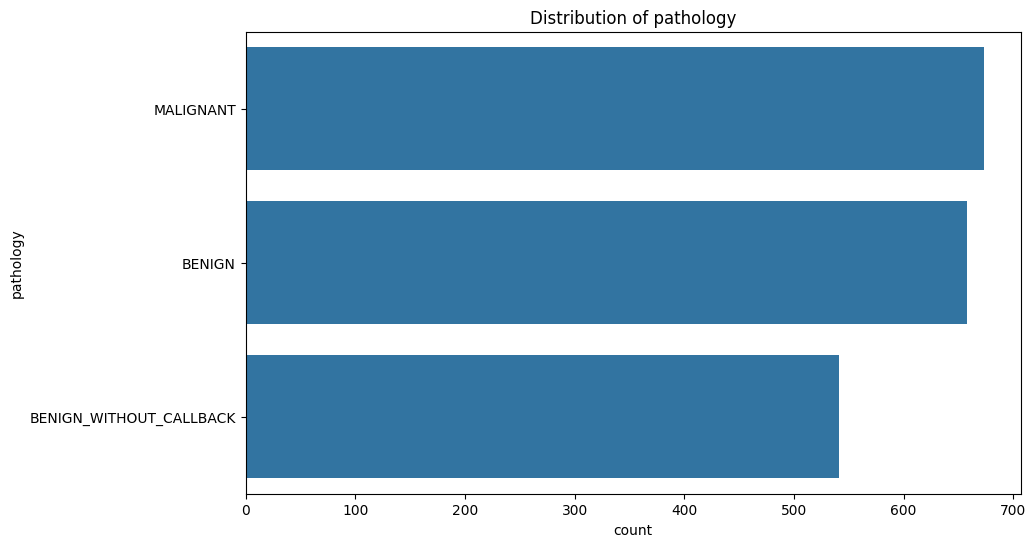

In [450]:
#histogram of pathology
plt.figure(figsize=(10, 6))
sns.countplot(calc_case_df.pathology)
plt.title('Distribution of pathology')
plt.show()


In [451]:
"""#drop all benign without callback rows
calc_case_df = calc_case_df[calc_case_df.pathology != 'BENIGN_WITHOUT_CALLBACK']
plt.figure(figsize=(10, 6))
sns.countplot(calc_case_df.pathology)
plt.title('Distribution of pathology')
plt.show()"""

"#drop all benign without callback rows\ncalc_case_df = calc_case_df[calc_case_df.pathology != 'BENIGN_WITHOUT_CALLBACK']\nplt.figure(figsize=(10, 6))\nsns.countplot(calc_case_df.pathology)\nplt.title('Distribution of pathology')\nplt.show()"

seems balanced

note: without callback means that the cancer is compleatly benign

In [452]:
calc_case_df.head()

patient_id  breast density left or right breast image view  abnormality id  \
0    P_00005               3                RIGHT         CC               1   
1    P_00005               3                RIGHT        MLO               1   
2    P_00007               4                 LEFT         CC               1   
3    P_00007               4                 LEFT        MLO               1   
4    P_00008               1                 LEFT         CC               1   

  abnormality type    calc type calc distribution  assessment  \
0    calcification    AMORPHOUS         CLUSTERED           3   
1    calcification    AMORPHOUS         CLUSTERED           3   
2    calcification  PLEOMORPHIC            LINEAR           4   
3    calcification  PLEOMORPHIC            LINEAR           4   
4    calcification          NaN          REGIONAL           2   

                 pathology  subtlety  \
0                MALIGNANT         3   
1                MALIGNANT         3   
2                   BENIGN         4   
3                   BENIGN         4   
4  BENIGN_WITHOUT_CALLBACK         3   

                                     image file path  \
0  Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...   
1  Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...   
2  Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...   
3  Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...   
4  Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...   

                             cropped image file path  \
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...   
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....   
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...   

                                  ROI mask file path  
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...  
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....  
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...  
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...  
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...

In [453]:
calc_case_df['cropped image file path']

0      Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
1      Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....
2      Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...
3      Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...
4      Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...
                             ...                        
321    Calc-Test_P_02464_RIGHT_MLO_1/1.3.6.1.4.1.9590...
322    Calc-Test_P_02498_RIGHT_CC_1/1.3.6.1.4.1.9590....
323    Calc-Test_P_02498_RIGHT_MLO_1/1.3.6.1.4.1.9590...
324    Calc-Test_P_02501_RIGHT_CC_1/1.3.6.1.4.1.9590....
325    Calc-Test_P_02501_RIGHT_MLO_1/1.3.6.1.4.1.9590...
Name: cropped image file path, Length: 1872, dtype: object

In [454]:
calc_case_df["subject_id"] = calc_case_df["cropped image file path"].apply(lambda x: x.split("/")[0])
calc_case_processed = calc_case_df[["pathology", "subject_id"]]
calc_case_processed.head()

pathology                         subject_id
0                MALIGNANT   Calc-Training_P_00005_RIGHT_CC_1
1                MALIGNANT  Calc-Training_P_00005_RIGHT_MLO_1
2                   BENIGN    Calc-Training_P_00007_LEFT_CC_1
3                   BENIGN   Calc-Training_P_00007_LEFT_MLO_1
4  BENIGN_WITHOUT_CALLBACK    Calc-Training_P_00008_LEFT_CC_1

In [455]:
#unite tables on subject_id and PatientID
dicom_cleaned_data['subject_id'] = dicom_cleaned_data["PatientID"]
dicom_cleaned_data = dicom_cleaned_data[["subject_id", "image_path"]]
dicom_cleaned_data.head()


subject_id  \
0  Mass-Training_P_01265_RIGHT_MLO_1   
1        Calc-Test_P_00562_LEFT_CC_2   
2   Calc-Training_P_00181_RIGHT_CC_1   
3    Calc-Training_P_01015_LEFT_CC_1   
4    Calc-Training_P_01497_LEFT_CC_1   

                                          image_path  
0  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...  
1  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...  
2  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...  
3  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...  
4  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...

In [456]:
dicom_cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3567 entries, 0 to 3566
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   subject_id  3567 non-null   object
 1   image_path  3567 non-null   object
dtypes: object(2)
memory usage: 55.9+ KB


In [458]:
calc_dicom_df = dicom_cleaned_data.copy()
calc_dicom_df = calc_dicom_df.merge(calc_case_processed, on='subject_id', how='inner')
calc_dicom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1871 entries, 0 to 1870
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   subject_id  1871 non-null   object
 1   image_path  1871 non-null   object
 2   pathology   1871 non-null   object
dtypes: object(3)
memory usage: 44.0+ KB


In [459]:
calc_dicom_df.head()

subject_id  \
0       Calc-Test_P_00562_LEFT_CC_2   
1  Calc-Training_P_00181_RIGHT_CC_1   
2   Calc-Training_P_01015_LEFT_CC_1   
3   Calc-Training_P_01497_LEFT_CC_1   
4      Calc-Test_P_00857_RIGHT_CC_1   

                                          image_path                pathology  
0  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...  BENIGN_WITHOUT_CALLBACK  
1  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...                   BENIGN  
2  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...                MALIGNANT  
3  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...                   BENIGN  
4  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.281604...                MALIGNANT

In [460]:
test_images = calc_dicom_df[['image_path', 'pathology']]
test_images['image_path'] = test_images['image_path'].apply(lambda x: '../data/raw/' + x)
test_images.head()

/var/folders/y0/8vyv832s3696sxgrt2_3v0k40000gn/T/ipykernel_71012/719986074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_images['image_path'] = test_images['image_path'].apply(lambda x: '../data/raw/' + x)


image_path                pathology
0  ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...  BENIGN_WITHOUT_CALLBACK
1  ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...                   BENIGN
2  ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...                MALIGNANT
3  ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...                   BENIGN
4  ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...                MALIGNANT

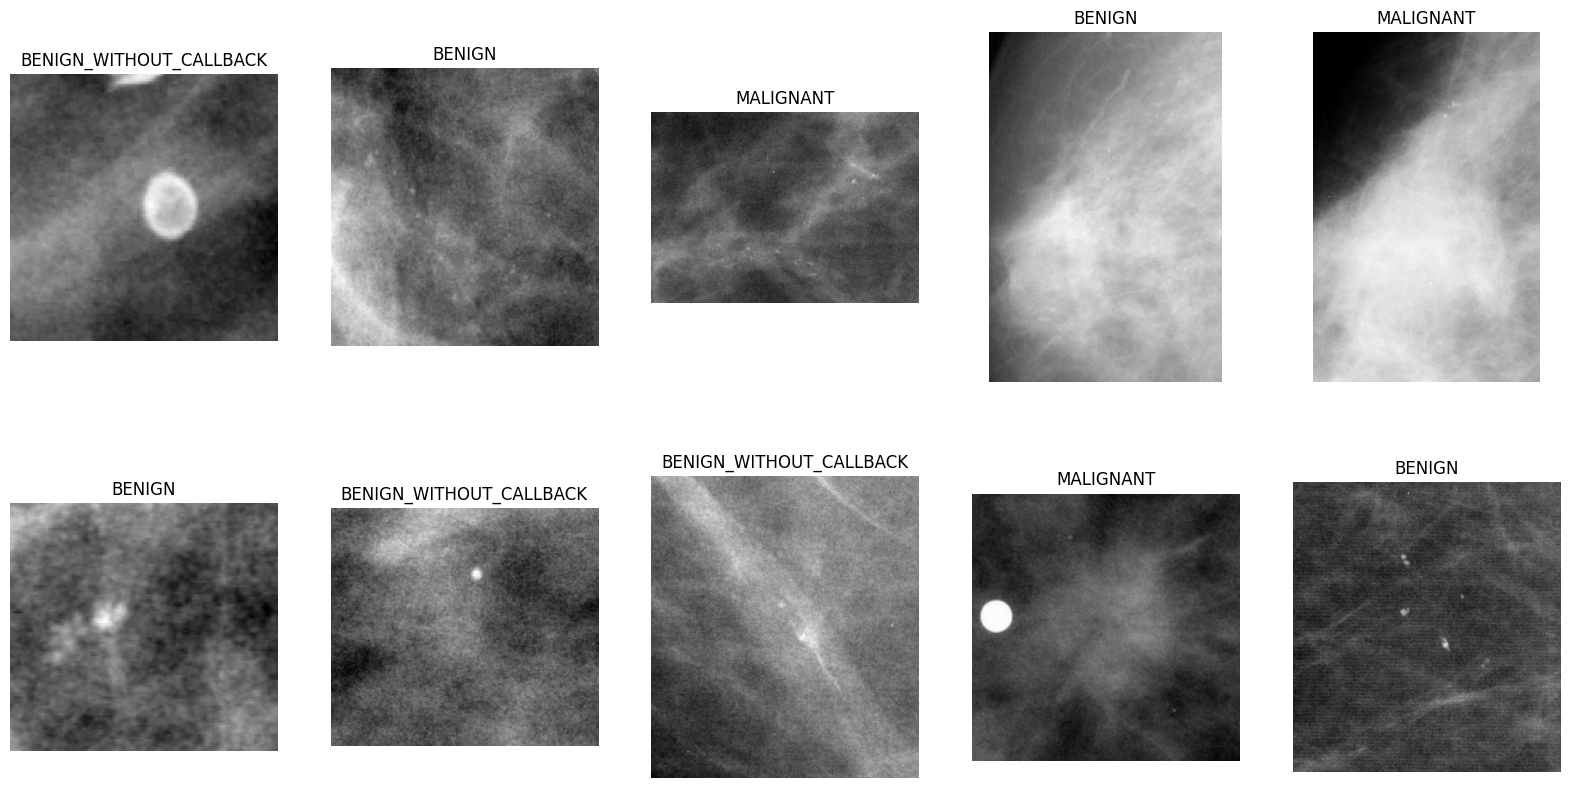

In [461]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
ax = ax.ravel()


#plot with pathology
for i, file in enumerate(test_images['image_path'][0:10]):
    img = imread(file)
    ax[i].imshow(img, cmap='gray')
    ax[i].axis('off')
    ax[i].set_title(test_images['pathology'][i], fontsize=12)

Text(0.5, 1.0, 'Distribution of pathology')

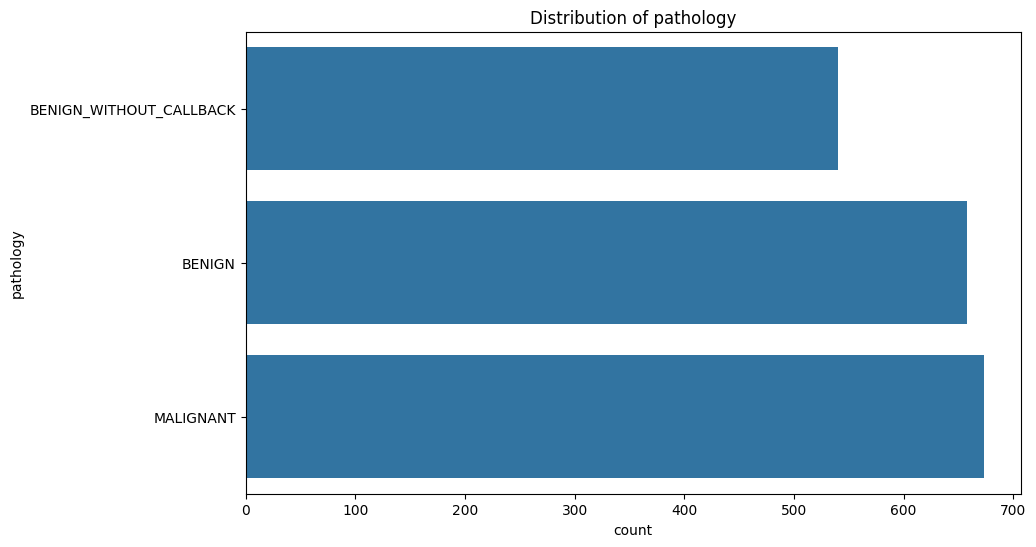

In [462]:
#histogram of pathology
plt.figure(figsize=(10, 6))
sns.countplot(test_images.pathology)
plt.title('Distribution of pathology')


In [463]:
#save the cleaned data to csv
calc_dicom_df.to_csv('../data/processed/calc_dicom.csv', index=False)

mass

In [465]:
mass_case_test_df = pd.read_csv('../data/raw/CBIS-DDSM/csv/mass_case_description_test_set.csv')
mass_case_test_df.info()
mass_case_train_df = pd.read_csv('../data/raw/CBIS-DDSM/csv/mass_case_description_train_set.csv')
mass_case_train_df.info()
#unify the two dataframes into one
mass_case_df = pd.concat([mass_case_train_df, mass_case_test_df], axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               378 non-null    object
 1   breast_density           378 non-null    int64 
 2   left or right breast     378 non-null    object
 3   image view               378 non-null    object
 4   abnormality id           378 non-null    int64 
 5   abnormality type         378 non-null    object
 6   mass shape               378 non-null    object
 7   mass margins             361 non-null    object
 8   assessment               378 non-null    int64 
 9   pathology                378 non-null    object
 10  subtlety                 378 non-null    int64 
 11  image file path          378 non-null    object
 12  cropped image file path  378 non-null    object
 13  ROI mask file path       378 non-null    object
dtypes: int64(4), object(10)
memory usage: 41.5

In [466]:
mass_case_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1696 entries, 0 to 377
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1696 non-null   object
 1   breast_density           1696 non-null   int64 
 2   left or right breast     1696 non-null   object
 3   image view               1696 non-null   object
 4   abnormality id           1696 non-null   int64 
 5   abnormality type         1696 non-null   object
 6   mass shape               1692 non-null   object
 7   mass margins             1636 non-null   object
 8   assessment               1696 non-null   int64 
 9   pathology                1696 non-null   object
 10  subtlety                 1696 non-null   int64 
 11  image file path          1696 non-null   object
 12  cropped image file path  1696 non-null   object
 13  ROI mask file path       1696 non-null   object
dtypes: int64(4), object(10)
memory usage: 198.8+ K

In [467]:
mass_case_df.head()

patient_id  breast_density left or right breast image view  abnormality id  \
0    P_00001               3                 LEFT         CC               1   
1    P_00001               3                 LEFT        MLO               1   
2    P_00004               3                 LEFT         CC               1   
3    P_00004               3                 LEFT        MLO               1   
4    P_00004               3                RIGHT        MLO               1   

  abnormality type                          mass shape   mass margins  \
0             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
1             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
2             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
3             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
4             mass                                OVAL  CIRCUMSCRIBED   

   assessment  pathology  subtlety  \
0           4  MALIGNANT         4   
1           4  MALIGNANT         4   
2           4     BENIGN         3   
3           4     BENIGN         3   
4           4     BENIGN         5   

                                     image file path  \
0  Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...   
1  Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...   
2  Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...   
3  Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...   
4  Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...   

                             cropped image file path  \
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...   
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...   
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....   

                                  ROI mask file path  
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...  
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...  
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...  
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...  
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....

In [468]:
mass_case_df["subject_id"] = mass_case_df["cropped image file path"].apply(lambda x: x.split("/")[0])
mass_case_processed = mass_case_df[["pathology", "subject_id"]]
mass_case_processed.head()

pathology                         subject_id
0  MALIGNANT    Mass-Training_P_00001_LEFT_CC_1
1  MALIGNANT   Mass-Training_P_00001_LEFT_MLO_1
2     BENIGN    Mass-Training_P_00004_LEFT_CC_1
3     BENIGN   Mass-Training_P_00004_LEFT_MLO_1
4     BENIGN  Mass-Training_P_00004_RIGHT_MLO_1

In [469]:
mass_dicom_df = dicom_cleaned_data.copy()
mass_dicom_df = mass_dicom_df.merge(mass_case_processed, on='subject_id', how='inner')
mass_dicom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1696 entries, 0 to 1695
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   subject_id  1696 non-null   object
 1   image_path  1696 non-null   object
 2   pathology   1696 non-null   object
dtypes: object(3)
memory usage: 39.9+ KB


In [470]:
mass_dicom_df.head()

subject_id  \
0  Mass-Training_P_01265_RIGHT_MLO_1   
1   Mass-Training_P_00242_RIGHT_CC_1   
2  Mass-Training_P_00634_RIGHT_MLO_1   
3       Mass-Test_P_00882_RIGHT_CC_1   
4   Mass-Training_P_00241_RIGHT_CC_1   

                                          image_path  pathology  
0  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...     BENIGN  
1  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.236373...     BENIGN  
2  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.357008...  MALIGNANT  
3  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.231894...     BENIGN  
4  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.286212...  MALIGNANT

In [471]:
test_images = mass_dicom_df[['image_path', 'pathology']]
test_images['image_path'] = test_images['image_path'].apply(lambda x: '../data/raw/' + x)
test_images.head()

/var/folders/y0/8vyv832s3696sxgrt2_3v0k40000gn/T/ipykernel_71012/3924468238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_images['image_path'] = test_images['image_path'].apply(lambda x: '../data/raw/' + x)


image_path  pathology
0  ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...     BENIGN
1  ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...     BENIGN
2  ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...  MALIGNANT
3  ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...     BENIGN
4  ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...  MALIGNANT

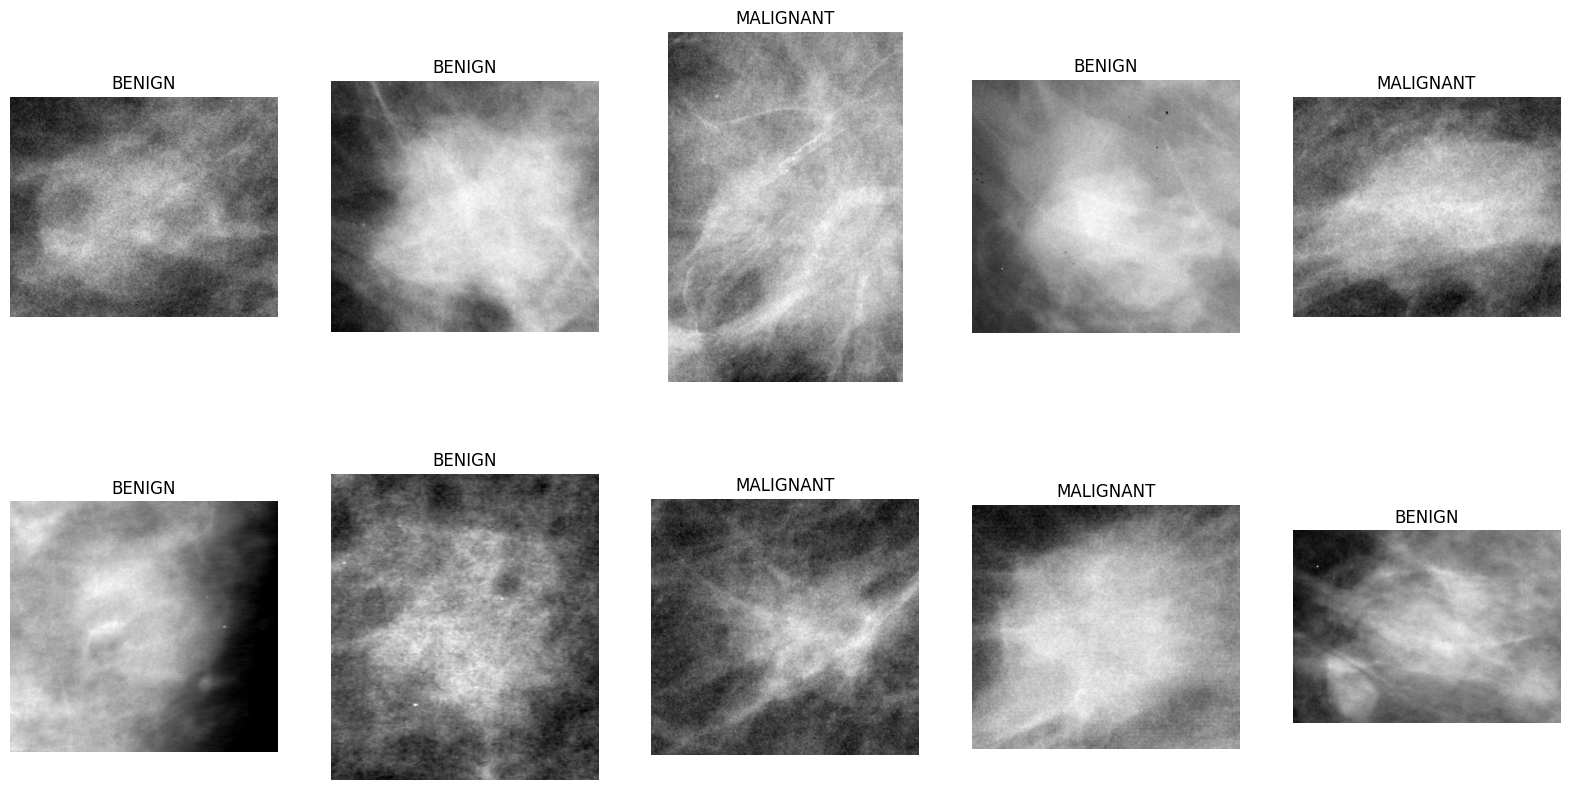

In [472]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
ax = ax.ravel()


#plot with pathology
for i, file in enumerate(test_images['image_path'][0:10]):
    img = imread(file)
    ax[i].imshow(img, cmap='gray')
    ax[i].axis('off')
    ax[i].set_title(test_images['pathology'][i], fontsize=12)

Text(0.5, 1.0, 'Distribution of pathology')

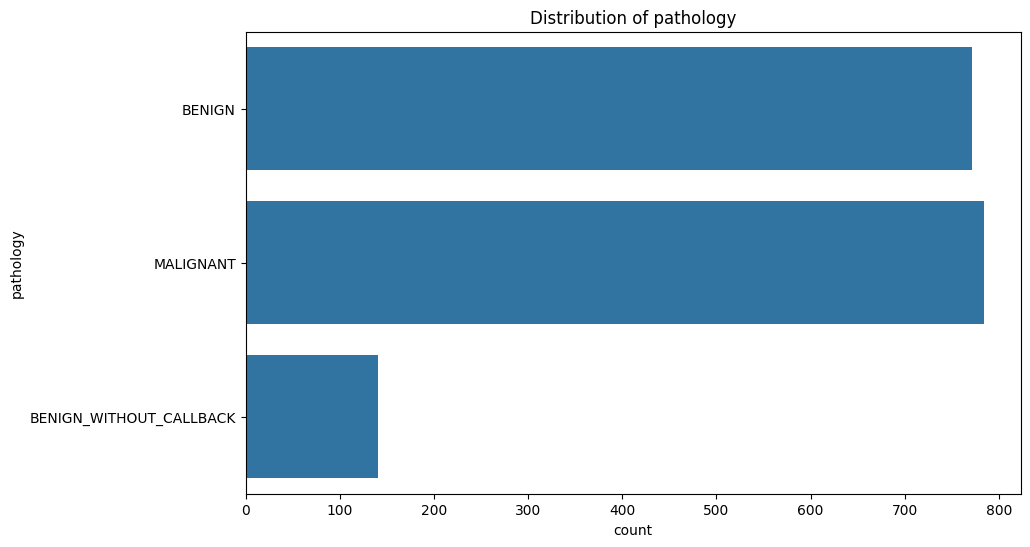

In [473]:
#plot histogram of pathology

plt.figure(figsize=(10, 6))
sns.countplot(test_images.pathology)
plt.title('Distribution of pathology')



In [474]:
#save the cleaned data to csv

mass_dicom_df.to_csv('../data/processed/mass_dicom.csv', index=False)